In [2]:
# imports
import sys
sys.path.append('../scripts')
import viz_tools
import cPickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline

Load data

In [3]:
with open('../exp/minibatch4/samples/latest.pkl','rb') as f:
    data = pkl.load(f)

View a heatmap of the mean across samples for the first particle and momentum value

/Users/charlesguthrie/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


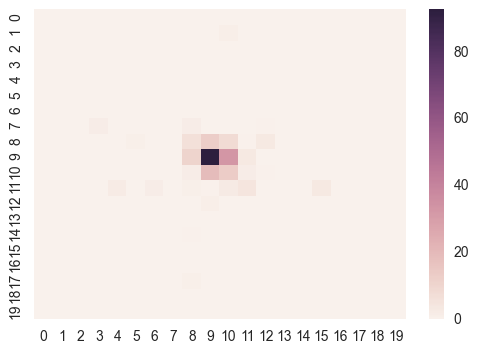

In [4]:
gs = data['gen_samples']
gs_mean = gs[:,0,0].mean(0)
sns.heatmap(gs_mean)

View heatmap of any slice of the data:

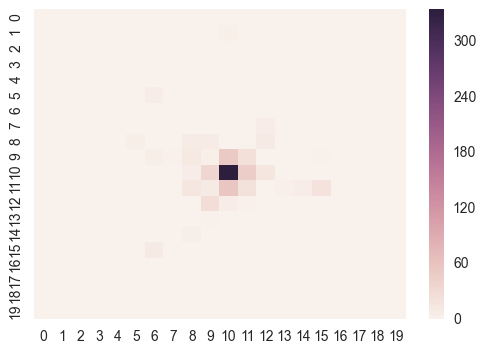

In [5]:
sns.heatmap(gs[1,1,4])

Heatmaps of a grid across all particle types and momentum values

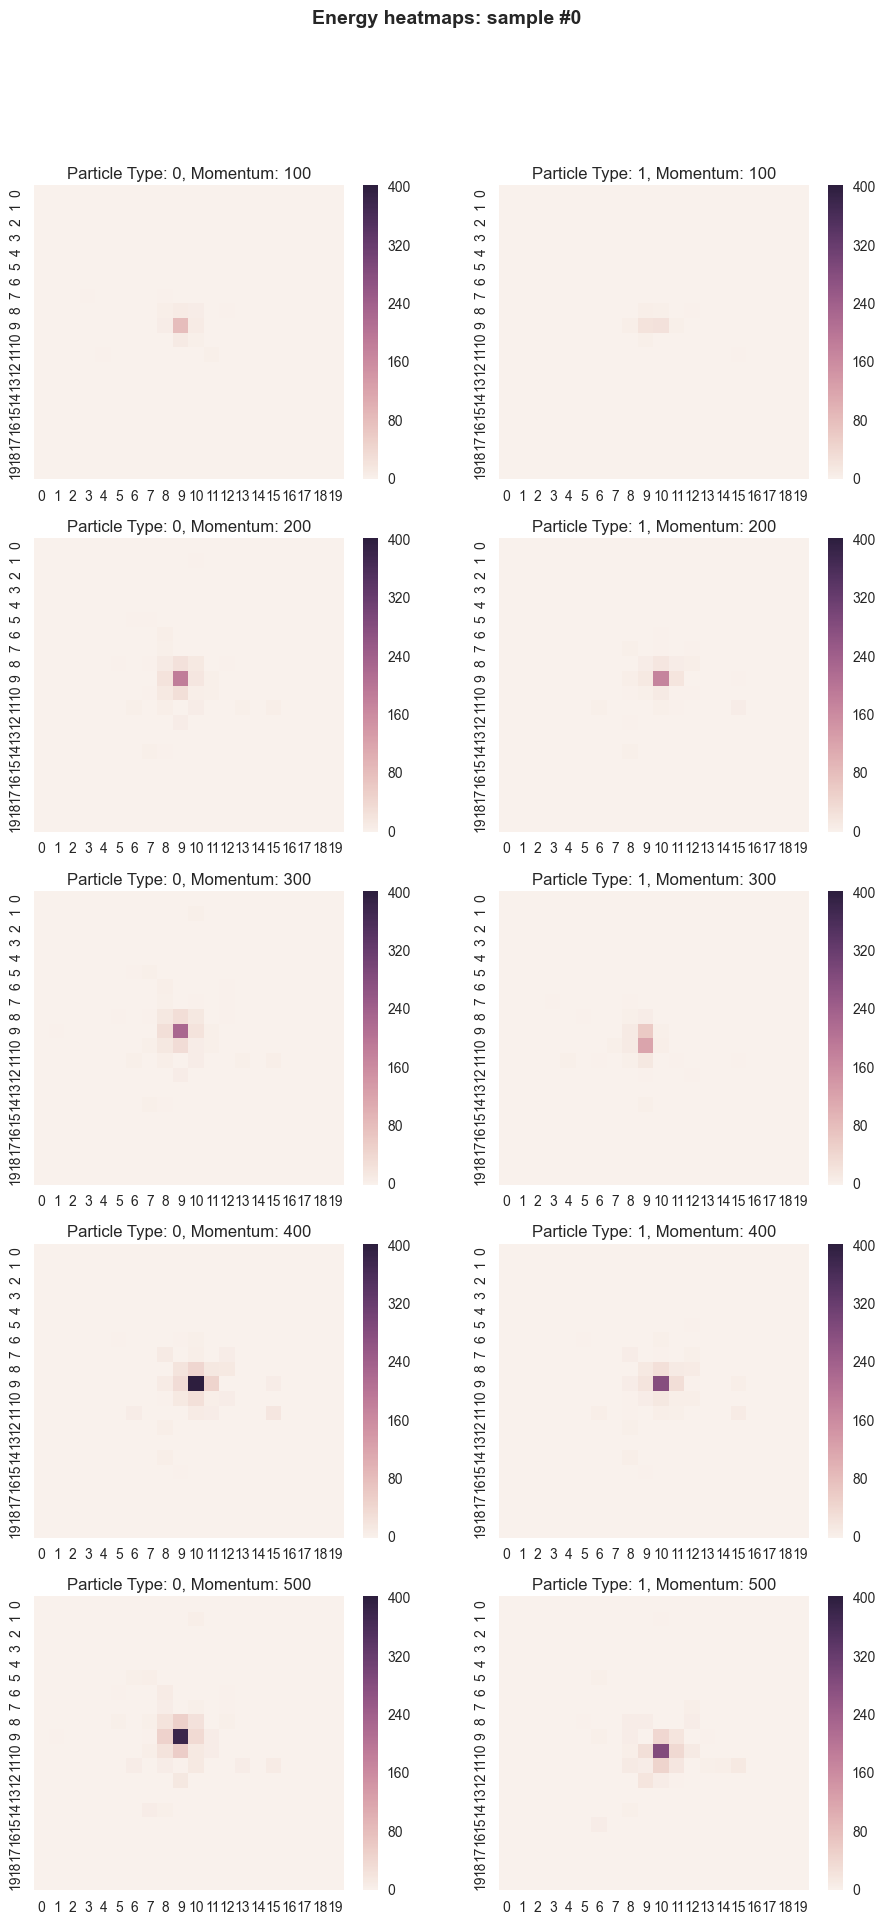

In [6]:
viz_tools.conditional_2d_heatmap(data, sample_id=0,scaling_root = 1, binary=False)

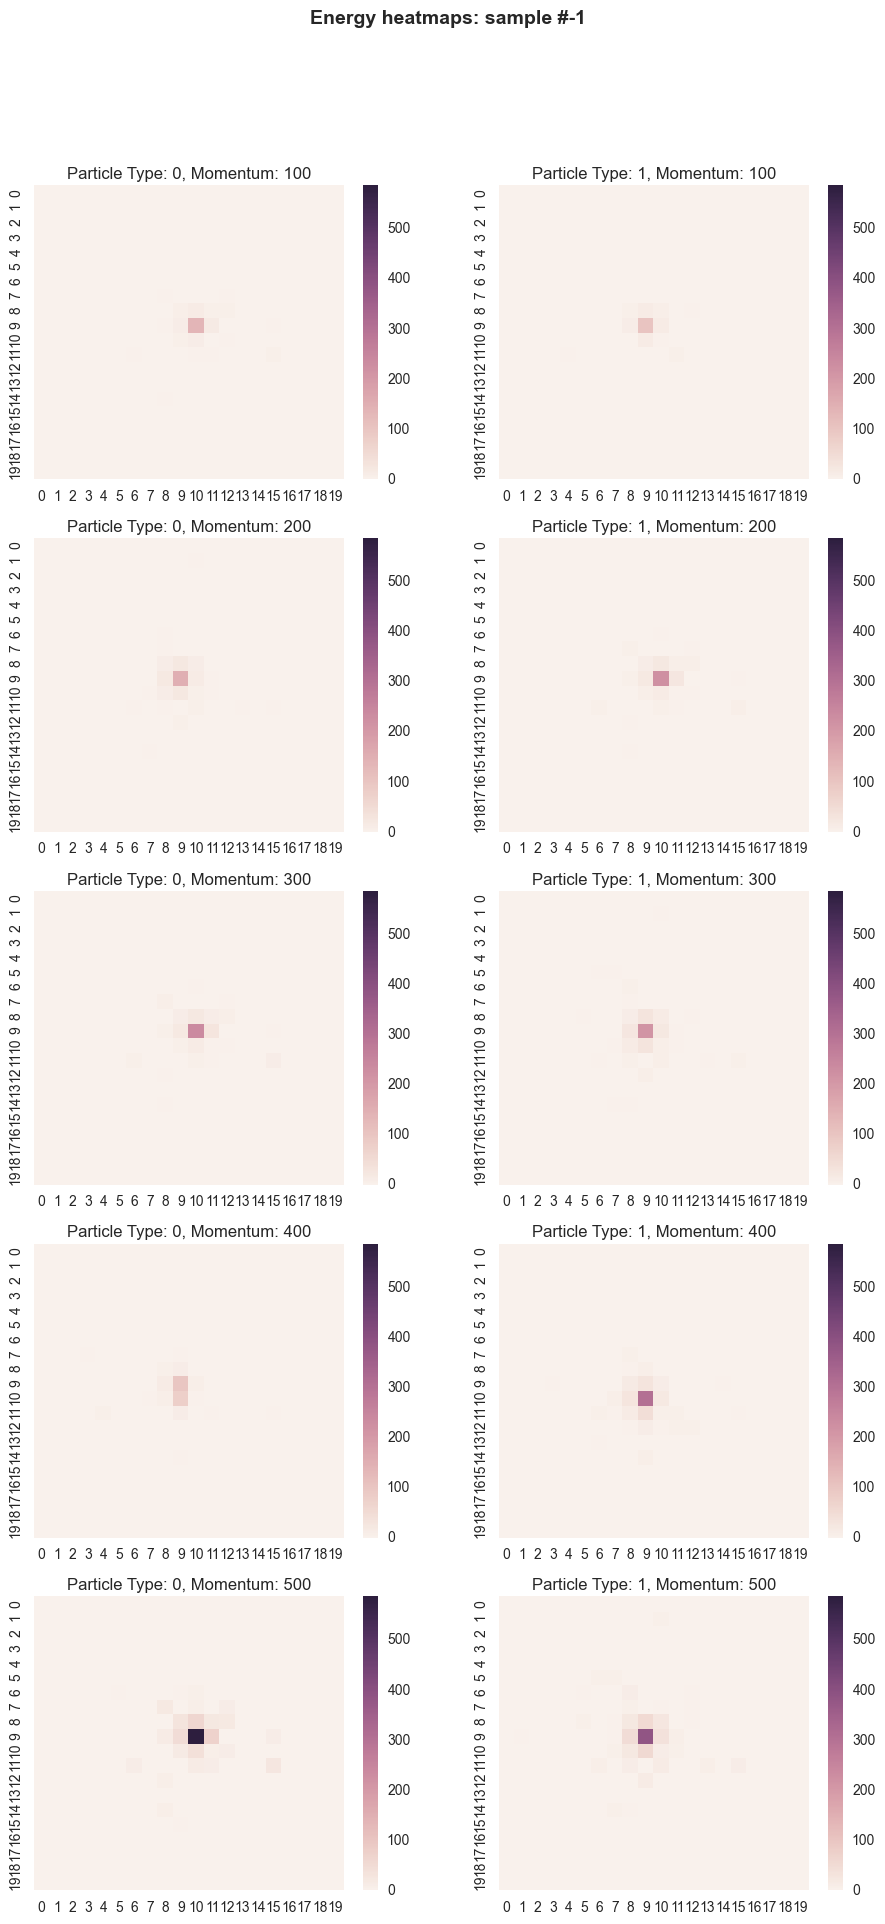

In [7]:
#sample_id = -1 yields average across all samples of the given particle, momentum
viz_tools.conditional_2d_heatmap(data, sample_id=-1, scaling_root = 1, binary=False)

In [4]:
def convert_samples(samples_npy):
    '''
    convert numpy array to proper visualization format
    not necessary for new experiments
    '''
    WIDTH = 20
    momentum = range(100,600,100)*2
    n_momentums = len(set(momentum))
    particle_type = [0]*5+[1]*5
    n_particles = len(set(particle_type))

    y = np.array(zip(particle_type,momentum)*100)
    gen_samples = samples_npy.reshape(100, n_particles, n_momentums, WIDTH, WIDTH)
    y = y.reshape(100,n_particles,n_momentums,n_particles)
    data = {'gen_samples':gen_samples,'y':y}
    return data

In [8]:
def convert_samples2(samples):
    '''
    convert old pkl format to new vis format
    not necessary for new experiments
    '''
    momentum = range(100,600,100)*2
    n_momentums = len(set(momentum))
    particle_type = [0]*5+[1]*5
    n_particles = len(set(particle_type))
    WIDTH = 20
    
    gen_samples=samples['gen_samples']
    y = samples['y']
    gen_samples = gen_samples.reshape(100, n_particles, n_momentums, WIDTH, WIDTH)
    y = y.reshape(100,n_particles,n_momentums,n_particles)
    return {'gen_samples':gen_samples,'y':y}